# Week 17 Homework

For this homework, I choose to work with the Abalone dataset found here: https://archive.ics.uci.edu/ml/datasets/Abalone

*Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

# Question 1.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

In [260]:
import csv

#import the data file and write out each row into a csv file
with open("abalone.data") as infile, open("abalone.csv", "w") as outfile:
    csv_writer = csv.writer(outfile)
    prev = ''
    csv_writer.writerow(['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])
    for line in infile:
        row = [field.strip() for field in line.split(',')]
        csv_writer.writerow(row)

In [261]:
import pandas as pd
import numpy as np

#load the abalone dataset from csv file and save as a pandas dataframe
abalone_df = pd.read_csv('./abalone.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [262]:
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [263]:
abalone_df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In order to use SMOTE, you need multiple samples for each class.  Some classes in this output dataset (Rings) only have one sample, so those columns need to be removed in order to use SMOTE and oversample the dataset.  The code below removes all columns where the number of samples is less than 3. 

In [264]:
# Get the count of each value
value_counts = abalone_df['Rings'].value_counts()

# Select the values where the count is less than 3
to_remove = value_counts[value_counts <= 3].index

# Keep rows where the rings column is not in to_remove
abalone_df = abalone_df[~abalone_df.Rings.isin(to_remove)]

In [265]:
#check value_counts again to make sure the classes with 3 or fewer samples were removed.
abalone_df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
Name: Rings, dtype: int64

In [266]:
#save the predictor variables into the dataframe X
X = abalone_df.drop('Rings', axis=1)
#save the independent variable y
y = abalone_df['Rings']

In [267]:
#Perform OneHotEncoding on only the 'Sex' Column to turn it into a numerical column instead of a categorical column. Drop the first column since it is repetitive data. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Sex", OneHotEncoder(drop='first'), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [268]:
new_df = pd.DataFrame(X, columns=["Sex1", "Sex2", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"])
feature_cols = new_df.columns
new_df.head()

,Sex1,Sex2,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [269]:
from sklearn.model_selection import train_test_split

#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [270]:
from sklearn.preprocessing import StandardScaler

#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

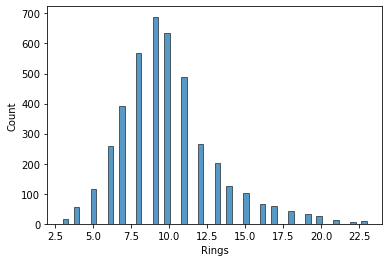

In [271]:
#Visualize the dataset to see if it is normal or skewed
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=abalone_df, x='Rings')

In [272]:
abalone_df.skew(axis=0)
#Because the skewness of Rings is close to 1, it is a skewed dataset. 

Length           -0.629315
Diameter         -0.599983
Height            3.171616
Whole Weight      0.531887
Shucked Weight    0.722607
Viscera Weight    0.595357
Shell Weight      0.603006
Rings             0.994657
dtype: float64

In [273]:
#We need to increase representation of the underrepresented classification (rings>20). We can do this by undersampling the larger classes using SMOTE. 

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE(random_state=42)
X_res, y_res = oversample.fit_resample(X_train, y_train)


<AxesSubplot:xlabel='Rings', ylabel='Count'>

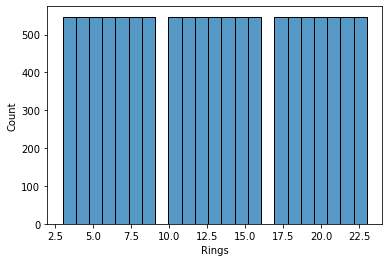

In [274]:
#Visualize the dataset again

sns.histplot(data=y_res)

# Question 2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

# Decision Tree Classifier with OverSampling

In [275]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)

In [276]:
#check what parameters are available
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [277]:
dt.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [278]:
y_pred = dt.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [280]:
print(score)

0.16546762589928057


This accuracy score is really low, so I will try using GridSearch Cross Validation to find the best hyperparameters for the model. 

In [283]:

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6, 7, 8, 9],'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2],'max_features': [0.2, 0.4,0.6, 0.8, 0.1, 0.2]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy', cv=10, n_jobs=-1)
# Fit 'grid_dt' to the training data

grid_dt.fit(X_res, y_res)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.1, 0.2],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2]},
             scoring='accuracy')

In [284]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [285]:
#Remake the model with the best parameters. 
dt = DecisionTreeClassifier(max_depth=8, max_features=0.8, min_samples_leaf=0.04, random_state=42)

In [286]:
#fit the model and make the predictions
dt.fit(X_res, y_res)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.20983213429256595


The accuracy score is still very low even after tuning the hyperparameters. 

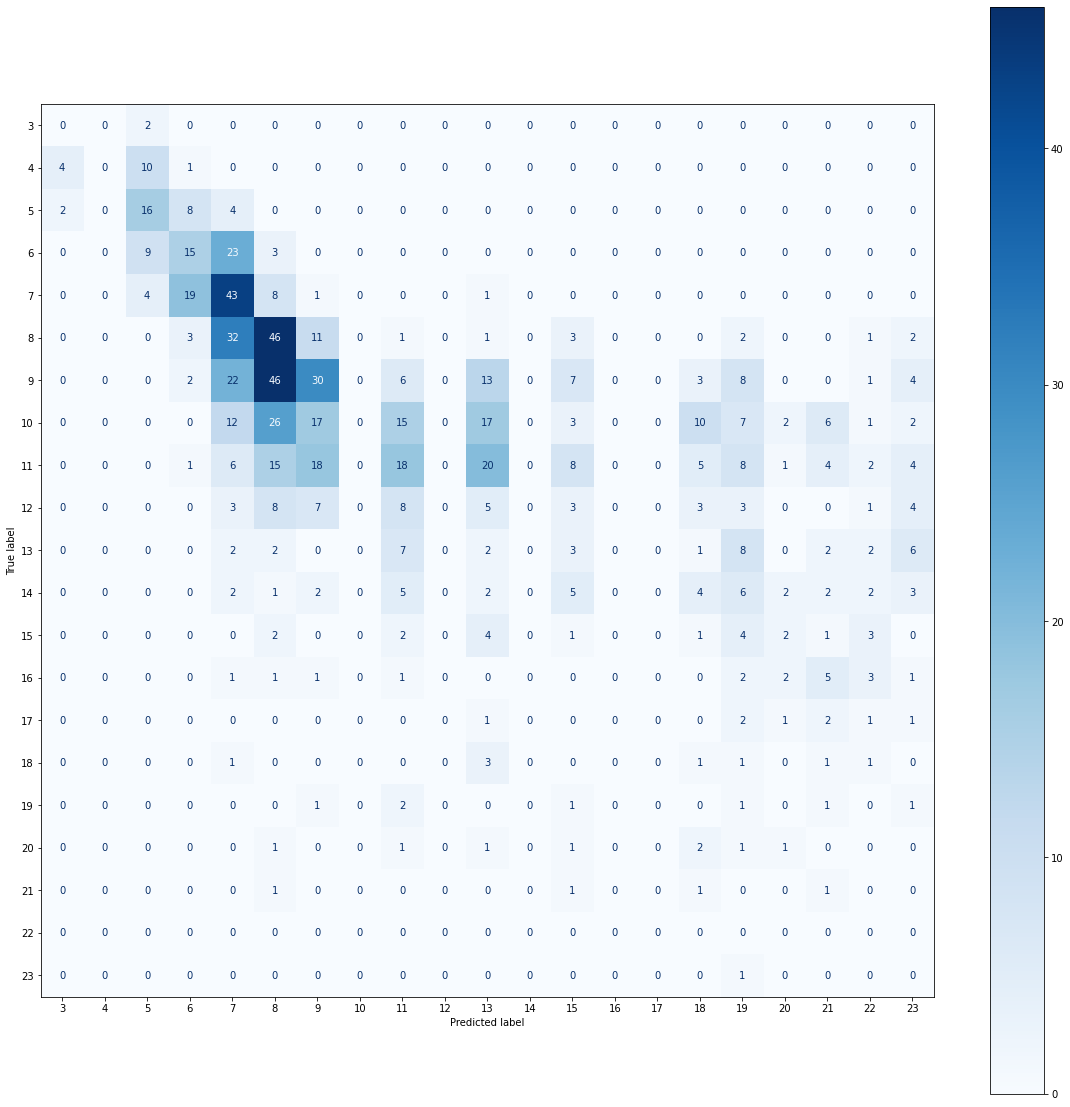

In [290]:
#get a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

# Decision Tree Classifier Without OverSampling

In [291]:
#Try without using the resampled dataset to see if classification improves.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6, 7, 8, 9],
             'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2],
             'max_features': [0.2, 0.4,0.6, 0.8, 0.1, 0.2]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy', cv=10, n_jobs=-1)
# Fit 'grid_dt' to the training data

grid_dt.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=8, max_features=0.8,
                                              min_samples_leaf=0.04,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.1, 0.2],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2]},
             scoring='accuracy')

In [292]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.08}


In [293]:
dt = DecisionTreeClassifier(max_depth=4, max_features=0.8, min_samples_leaf=0.08, random_state=42)

In [294]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.2517985611510791


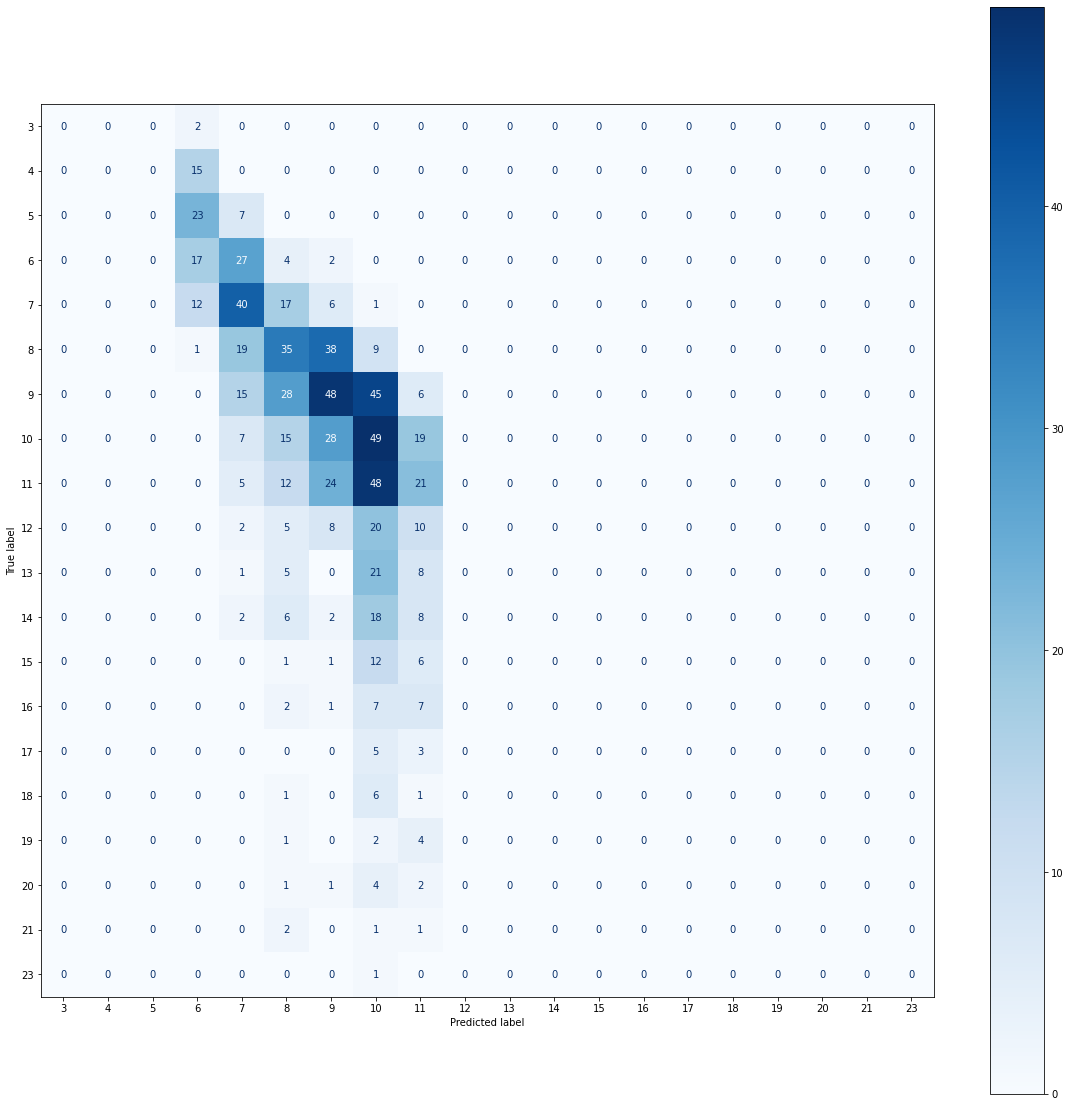

In [295]:
#get a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

# Decision Tree Regressor
This data may be better evaluated using a regression method, because predicting exact age using a classifier is difficult, but if we see age as a continuous variable, then a regressor method should be better.  

In [393]:
#Try a regression method
#load the abalone dataset from csv file and save as a pandas dataframe
abalone_df = pd.read_csv('./abalone.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [394]:
#save the predictor variables into the dataframe X
X = abalone_df.drop('Rings', axis=1)
#save the independent variable y
y = abalone_df['Rings']

In [395]:
#Perform OneHotEncoding on only the 'Sex' Column to turn it into a numerical column instead of a categorical column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Sex", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [396]:
from sklearn.model_selection import train_test_split

#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [397]:
from sklearn.preprocessing import StandardScaler

#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [398]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

In [399]:
from sklearn.metrics import mean_squared_error as MSE

In [400]:
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)

In [401]:
print(rmse_dt)

3.162655900425718


In [402]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [403]:
#Tune the model to reduce error
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6, 7, 8, 9],'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2],'max_features': [0.2, 0.4,0.6, 0.8, 0.1, 0.2]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dtr,param_grid=params_dt,scoring='accuracy', cv=10, n_jobs=-1)
# Fit 'grid_dt' to the training data

grid_dt.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  wa

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.1, 0.2],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2]},
             scoring='accuracy')

In [404]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [409]:
dtr = DecisionTreeRegressor(max_depth=3, max_features=0.2, min_samples_leaf=0.04)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

2.575791462673482


In [410]:
#The regressor method performs really well with root mean square error down to 2.57 after tuning by selecting the best hyperparameters. 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02571
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.64894
Feature: 4, Score: 0.01461
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.06908
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.24165


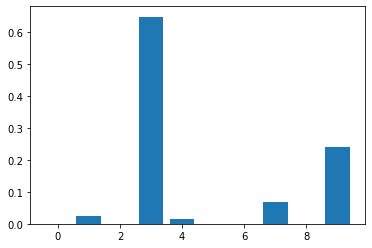

In [411]:
#get feature importance
importance = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [412]:
#This graph shows that features 3 and 9, or Length and Shell Weight are by far the most important features in determining age. We can remove other columns and run the model again. 

In [413]:
#save the predictor variables into the dataframe X
X = abalone_df[['Length','Shell Weight']]
X = np.array(X)
#X = np.array(X).reshape(-1,1)
#save the independent variable y
y = abalone_df['Rings']

In [414]:
from sklearn.model_selection import train_test_split

#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [415]:
#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [416]:
#Tune the model to reduce error
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6, 7, 8, 9],'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2],'max_features': [0.2, 0.4,0.6, 0.8, 0.1, 0.2]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dtr,param_grid=params_dt,scoring='accuracy', cv=10, n_jobs=-1)
# Fit 'grid_dt' to the training data

grid_dt.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  wa

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=3, max_features=0.2,
                                             min_samples_leaf=0.04),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.1, 0.2],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 0.2]},
             scoring='accuracy')

In [417]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [418]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, max_features=0.2, min_samples_leaf=0.04)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

In [419]:
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

2.5970565016576694


In [420]:
#Altering the features to only keep length and shell weight keeps the rmse about the same with a value of 2.59.

# Discussion: 

Looking at both a Classification and a Regression Tree, it seems like the regression tree performs much better with age prediction using the number of rings in the shell.  The model was hypertuned using a 10-fold cross validation grid search to find the best parameters for the model.  In particular, I looked at the best parameters for max_depth, max_features and min_samples_leaf.  You could also at more parameters as well to try and improve the model.  This brought the root-mean-squared error down to 2.56.  I also used feature importances to find the most important features used to make the prediction by the model and found that shell weight and length were the most important features.  I removed the other features and re-ran the model and found about the same rmse (2.59).

# 3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [449]:
from sklearn.ensemble import RandomForestRegressor

In [459]:
#save the predictor variables into the dataframe X
X = abalone_df.drop('Rings', axis=1)
#save the independent variable y
y = abalone_df['Rings']

In [460]:
#Perform OneHotEncoding on only the 'Sex' Column to turn it into a numerical column instead of a categorical column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Sex", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [461]:
#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [462]:
#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [438]:
#Instantiate a Random Forest Regessor
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=42)

# Fit the model to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Calculate the root mean square error
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)


2.477040378755043


This reduced rmse to 2.477 which is an inprovement over the single regression tree. Next, try to tune the random forest.

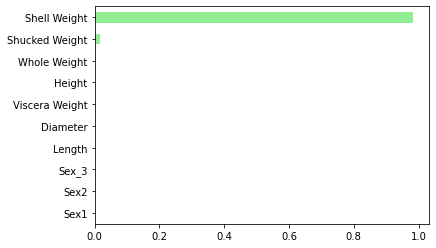

In [441]:
new_df = pd.DataFrame(X, columns=["Sex1", "Sex2", "Sex_3", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"])

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = new_df.columns)
# Sort importances_rf        
sorted_importances_rf = importances_rf.sort_values()   
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen') 
plt.show()

In [442]:
#Remake the model using only shell weight

In [444]:
#save the predictor variables into the dataframe X
X_new = abalone_df['Shell Weight']
X = np.array(X_new).reshape(-1,1)
#save the independent variable y
y = abalone_df['Rings']

In [445]:
#split the dataset into testing and training portions, with the testing portion making up 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [446]:
#Standardize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [447]:
#Instantiate a Random Forest Regessor
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=42)

# Fit the model to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Calculate the root mean square error
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.5014405121406518


Removing all features except for Shell Weight only slightly increased rmse.  This could be useful if calculation time needed to be considered in a pipeline for example, but for now, we can leave all the features. 

In [448]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [463]:
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf, 
                       cv=3,
                       scoring='neg_mean_squared_error',                       
                       verbose=1,                       
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=4, max_features='log2',
                                             min_samples_leaf=0.1,
                                             n_estimators=500,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [465]:
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [466]:
#Instantiate a new Random Forest Regessor with best parameters
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=0.1, max_depth=4, max_features='log2', random_state=42)

# Fit the model to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Calculate the root mean square error
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.4913674904824745


This only slightly reduced the rmse to a value of 2.49. I tuned it using the gridsearch cross validation approach that selects the best hyperparameters for the random forest regressor. 

# 4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [499]:
#First try an ensemble approach using GradientBoosting Regressor

In [467]:
from sklearn.ensemble import GradientBoostingRegressor

In [468]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1,                                  
                                 subsample=0.8,                                 
                                 max_features=0.2,                                 
                                 n_estimators=300,                                              
                                 random_state=42)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)


In [469]:
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.3173571625088054


In [471]:
sgbt.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 1,
 'max_features': 0.2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.8,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [472]:
# tune the model's hyperparameters. 
params_sgbt = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8, 10],
             'min_samples_leaf': [0.1, 0.2, 0.3],
             'max_features': [0.1, 0.2, 0.3, 0.4]}

# Instantiate 'grid_rf'
grid_sgbt = GridSearchCV(estimator=sgbt,
                       param_grid=params_sgbt, 
                       cv=3,
                       scoring='neg_mean_squared_error',                       
                       verbose=1,                       
                       n_jobs=-1)

grid_sgbt.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(max_depth=1, max_features=0.2,
                                                 n_estimators=300,
                                                 random_state=42,
                                                 subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [0.1, 0.2, 0.3, 0.4],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [474]:
# Extract best hyperparameters from 'grid_sgbt'
best_hyperparams = grid_sgbt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 0.1, 'n_estimators': 400}


In [475]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=4,                                  
                                 subsample=0.8,                                 
                                 max_features=0.4,                                 
                                 n_estimators=400,                                              
                                 random_state=42)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)

In [476]:
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.202935765825399


# XGBoost Regressor

In [478]:
from xgboost import XGBRegressor

In [479]:
xgbr = XGBRegressor()

In [480]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [481]:
y_pred = xgbr.predict(X_test)

In [482]:
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.338730675978196


In [483]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [493]:
# tune the model's hyperparameters. 
params_xgbr = {'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [4, 6, 8, 10],
             'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05]}

# Instantiate 'grid_rf'
grid_xgbr = GridSearchCV(estimator=xgbr,
                       param_grid=params_xgbr, 
                       cv=3,
                       scoring='neg_mean_squared_error',                       
                       verbose=1,                       
                       n_jobs=-1)

grid_xgbr.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=4, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             

In [494]:
# Extract best hyperparameters from 'grid_sgbt'
best_hyperparams = grid_xgbr.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 400}


In [496]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt' using best hyperparameters
xgbr = XGBRegressor(learning_rate=0.02,                                  
                    max_depth=4,                                                                 
                    n_estimators=400,                                              
                    random_state=42)
# Fit 'sgbt' to the training set
xgbr.fit(X_train, y_train)
# Predict the test set labels
y_pred = xgbr.predict(X_test)

In [497]:
#find the rmse of the xgbregressor model
rmse = MSE(y_test, y_pred)**(1/2)
print(rmse)

2.156099919665768


This reduced root mean squared error to the lowest yet, 2.15.  The parameters were tuned using the grid serach cross validation method where best n_estimators, max_depth, and learning rate were selected from lists of 4-5 choices.  The model could be optimized further by tuning additional variables. 

In [490]:
#make predictions using the training data
training_pred = xgbr.predict(X_train)

In [498]:
#find rmse of the training dataset
rmse_training = MSE(y_train, training_pred)**(1/2)
print(rmse_training)

1.7085737491594577


The rmse of the training dataset is less than the rmse off the test dataset which is expected since it was trained on that specific data but could also indicate some overfitting of the model.

# 5.	Which model performed best? What is your performance metric? Why? 

XGBRegressor performed the best.  I used RMSE to compare the performance of the different models.  This is a good metric for regression models because it gives the error from the predicted values and the test data values and works for continuous datasets.  The classification models did not work well for this problem because it was a nonbinary dataset and the prediction variables were used to determine age (a continuous variable). You cannot use accuracy as a metric for a regression problem because accuracy looks at the percent of cases that are classified correctly, so it is used for classification models. I tried multiple regression models and compared rmse of each model and found that the Gradient Boosting Regressor had the lowest RMSE with a value of 2.15.  